**1. Import Necessary Libraries**

In [1]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from scipy.stats import skew
import seaborn as sns
import pandas as pd
import numpy as np
import math

**2. To read the data into Python.**

In [2]:
df = pd.read_csv('Default.csv')
df.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


### **DATA CLEANING**

**3. Rename Columns**

In [3]:
df = df.rename ({'Unnamed: 0': 'id'}, axis =1)   # renaming since the original name had a currency symbol
df.head()

,id,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


**4. Use first column as index**

In [4]:
df.set_index('id', inplace=True)
df.head()

,default,student,balance,income
id,,,,
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


**5. Check For any missing Values**

In [5]:
print(df.isnull().sum())    # return total no. of null values in each attribute

default    0
student    0
balance    0
income     0
dtype: int64


**6. Check for any duplicate entries**

In [6]:
print(df.duplicated().sum())    # return total no. of duplicate rows in the dataset

0


**7. Stripping trailing spaces in column names**

In [7]:
df.columns = df.columns.str.strip()     # Remove leading and trailing whitespace in column names
print(df.columns)

Index(['default', 'student', 'balance', 'income'], dtype='object')


**8. Dealing with Inconsistent Data**

In [8]:
numerical_cols = df.select_dtypes(include=np.number).columns    # return the names of attributes that are of numerical types like integer or float or decimal
print(numerical_cols)

Index(['balance', 'income'], dtype='object')


In [9]:
# Check if any attribute has negative value as these are quantitative attributes and can only have positive values
for col in numerical_cols:
    invalid = df[df[col] < 0]   # Create a new DataFrame containing only the rows where the value in the current column is negative

    if not invalid.empty:
        print(f"Invalid (negative) values found in '{col}':\n", invalid)
        print("-" * 30) # Print a separator for better readability

**9. Check for Data Types**

In [10]:
print(df.info())    # Check if every attribute has appropriate data types and count of records in each attribute

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 390.6+ KB
None


-------
**SUMMARY OF DATA CLEANING:**

-------

- used first column as index
- No missing values.
- No duplicate records.
- No negative values in any attributes.
- Removed Trailing spaces in column names.
- Renamed Columns.

### **DESCRIPTIVE STATISTICAL ANALYSIS**

**10. To produce a numerical summary of the variables in the data set.**

In [11]:
df.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729272
max,2654.322576,73554.233495


**Insights of step 10:**
- Count shows that there is no missing values in the attributes `balance` and `income`.
- min and max value says there can be presence of outliers so need further investigation in this area as max is quite high.
- mean and median (50% quartile) says that the `income` attribute might be slightly skewed.
- Since range of attributes `balance` and `income` is too different, sure it needs to be normalized.

**11. Coefficient Of Variation**

In [12]:
# CoV should be low, ideally < 1, which indicates low volatility in the data.
# If CoV is low, it means the data points are close to the mean and there are no extreme outliers.

print("--- Coefficient of Variation (CV) ---")
for col in numerical_cols:
    mean = df[col].mean()
    std = df[col].std()
    if mean != 0:
        cv = (std / mean) * 100
        print(f"CoV for {col}: {cv:.2f}%")
    else:
        print(f"CoV for {col}: Mean is zero, cannot calculate CV.")

--- Coefficient of Variation (CV) ---
CoV for balance: 57.90%
CoV for income: 39.79%


**12. Median and Mode**

In [13]:
# The median provides a measure of central tendency that is robust to outliers, while the mode indicates the most frequently occurring value.
# Mean > Median > Mode means right-skewed distribution (positive skewness)
# Mean < Median < Mode means left-skewed distribution (negative skewness)
# Mean = Median = Mode means symmetric distribution

print("--- Median and Mode ---")
for col in numerical_cols:
    median = df[col].median()
    mode = df[col].mode()
    mean = df[col].mean()
    print(f"{col}:")
    print(f"  Mean: {mean:.2f}")
    print(f"  Median: {median:.2f}")
    if not mode.empty:
        print(f"  Mode: {mode.tolist()[0]}")
    else:
        print("  Mode: No unique mode found (or multiple modes)")

--- Median and Mode ---
balance:
  Mean: 835.37
  Median: 823.64
  Mode: 0.0
income:
  Mean: 33516.98
  Median: 34552.64
  Mode: 771.967729386357


**13. Skewness Coefficient**

In [14]:
# Skewness indicates the asymmetry of the distribution of values in a dataset.
# If skewness > 0, the data is right-skewed (long tail on the right).
# If skewness < 0, the data is left-skewed (long tail on the left).
# If skewness = 0, the data is perfectly symmetrical.

print("--- Skewness Coefficient ---")
for col in numerical_cols:
    skewness = df[col].skew()
    print(f"Skewness for {col}: {skewness:.2f}")
    if skewness > 0.5:
        print(f"  - {col} is right-skewed.")
    elif skewness < -0.5:
        print(f"  - {col} is left-skewed.")
    elif skewness >= -0.5 and skewness <= 0.5:
        print(f"  - {col} is fairly symmetrical.")
    else:
        print(f"  - {col} shows moderate skewness.")

--- Skewness Coefficient ---
Skewness for balance: 0.25
  - balance is fairly symmetrical.
Skewness for income: 0.07
  - income is fairly symmetrical.


-------
**SUMMARY OF DESCRIPTIVE STATISTICAL ANALYSIS:**

-------
Since,
*  The `balance` feature has a higher CoV than income. This means that `balance` is more spread out and variable relative to its mean compared to income. This is an important insight that further emphasizes the need for feature scaling.
* For `balance` and `Income`, the mean and median are so close.
* Skewness Coefficient for the above attributes does not exceed 0.5

We can say that the above mentioned attributes are fairly **symmetrically-Skewed**.

### **EXPLORATORY DATA ANALYSIS**

**14. Univariate Analysis: Analysis on numerical Variables**

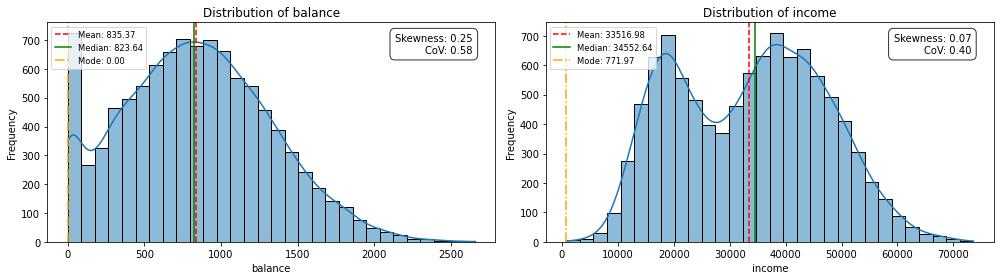

In [15]:
# Visualize distributions of numerical columns using Histogram plot
# This helps to understand the distribution and identify any potential outliers.
# Kernel Density Estimation (KDE) is also plotted to visualize the distribution shape.
# The mean, median, and mode are indicated on the plots for reference.
# Additionally, the skewness is displayed to understand the asymmetry of the distribution.
# The coefficient of variation (CV) is also shown to assess the relative variability.

nrows = math.ceil(len(numerical_cols) / 2)
plt.figure(figsize=(14, nrows * 4))

for i, col in enumerate(numerical_cols):
    plt.subplot(nrows, 2, i + 1)
    
    # Calculate key statistics
    mean = df[col].mean()
    median = df[col].median()
    mode = df[col].mode()[0] if not df[col].mode().empty else None
    std_dev = df[col].std()
    
    # Calculate Skewness and Coefficient of Variation (CoV) using scipy's skewness to get a unbiased version of skewness
    skewness = skew(df[col], nan_policy='omit')
    cov = (std_dev / mean) if mean != 0 else np.inf

    # Plot the histogram
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Plot lines for mean, median, and mode
    plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
    plt.axvline(median, color='green', linestyle='-', label=f'Median: {median:.2f}')
    if mode is not None:
        plt.axvline(mode, color='orange', linestyle='-.', label=f'Mode: {mode:.2f}')
    
    # Add a text box with the statistics
    stats_text = f"Skewness: {skewness:.2f}\n" \
                 f"CoV: {cov:.2f}"
    
    plt.legend(loc='upper left', fontsize='small')
    plt.text(0.95, 0.95, stats_text, transform=plt.gca().transAxes, fontsize=10,
             verticalalignment='top', horizontalalignment='right',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

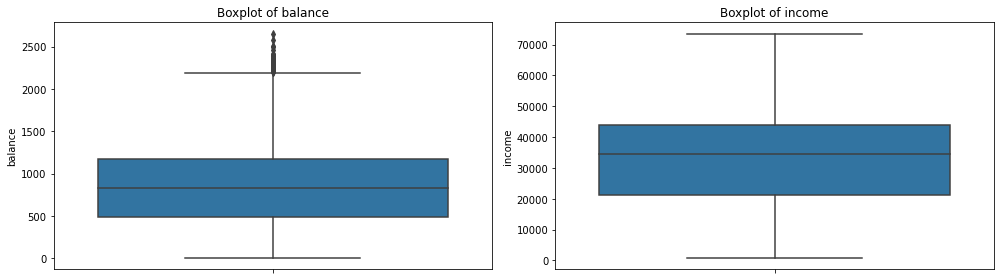

In [16]:
# Visualize distributions of numerical columns using Box plot

nrows = math.ceil(len(numerical_cols) / 2)
plt.figure(figsize=(14, nrows * 4))

for i, col in enumerate(numerical_cols):
    plt.subplot(nrows, 2, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

**Insights of Step 14**

In addition to initial statistical checks, detailed univariate analysis using histogram and boxplots confirmed the presence of significant outliers in the attribute `balance`.

* The histogram blot shows that the dataset is symmetrically distributed.
* We conclude that the `balance` attribute has **potential outliers**. The reasons is that in box plot,
    - The space of the upper whisker is longer than the lower whisker.
    - More Bubbles are witnessed outside of the whisker which are actually the outliers.

These points, largely representing plausible but exceptionally high or low characteristics, suggest that careful consideration of data transformation (e.g., log scaling) will be essential during preprocessing to manage their potential impact on machine learning model performance and to normalize feature distributions.

**15. Explore Relationship between variables: Correlation Coefficient Heatmap**

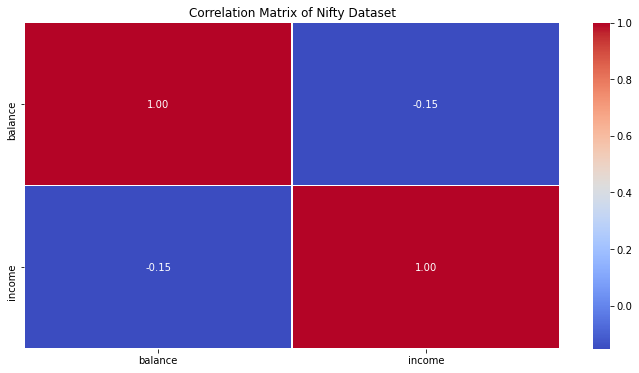

In [17]:
# Calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Nifty Dataset')
plt.show()

**Insights of Step 15**

So, From the above correlation coefficient Heatmap, we can infer that, balance and income attributes do have any linear relationship between them.

**16. Check for class labels distribution**

Class counts:
No     9667
Yes     333
Name: default, dtype: int64

 ----------
Class percetages
No     96.67
Yes     3.33
Name: default, dtype: float64

 ----------
Class distribution


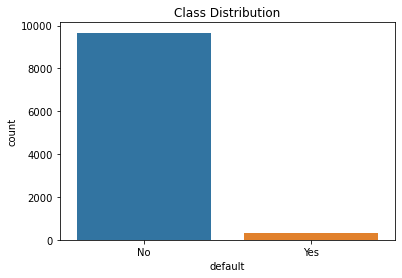

In [18]:
print("Class counts:")
class_counts = df['default'].value_counts()
print(class_counts)

print("\n", "-"*10)
print("Class percetages")
total_samples = len(df)
class_percentages = (class_counts / total_samples) * 100
print(class_percentages)

print("\n", "-"*10)
print("Class distribution")
plt.figure(figsize=(6, 4))
sns.countplot(x='default', data=df)
plt.title('Class Distribution')
plt.show()

------
**SUMMARY OF EDA:**

------
- To Handle Outliers: [`balance`]
    - Do nothing (or)
    - Remove outlier records (or)
    - Drop the attributes if not needed (or)
    - Transform the data
- The data is non-linear.
    - Logistic regression model might struggle with non-linear relationship.
    - K-NN and Naive Bayes could better perform with non-linear relationship.
- The dataset is imbalanced.
    - can lead to accuracy paradox (the model can achieve 97% accuracy just by predicting as 'No' for every input, so doesn't learn about minority class), 
    - can lead to poor minority class performance (check confusion matrix, recall, and f1-score of minority class)
    - use oversampling or undersampling to fix this issue.
    - Address Class Imbalance with SMOTE (preferred).

### **DATA PREPROCESSING**

**17. Handling Outliers**

In [19]:
Q1 = df['balance'].quantile(0.25)
Q3 = df['balance'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound for 'balance': {lower_bound:.2f}")
print(f"Upper bound for 'balance': {upper_bound:.2f}")

outliers = df[(df['balance'] < lower_bound) | (df['balance'] > upper_bound)]
print(f"\nNumber of outliers detected: {len(outliers)}")

df['balance_capped'] = np.where(df['balance'] > upper_bound, upper_bound,
                                np.where(df['balance'] < lower_bound, lower_bound, df['balance']))

Lower bound for 'balance': -545.13
Upper bound for 'balance': 2193.17

Number of outliers detected: 31


**18. Label Encoding**:

In [20]:
le = LabelEncoder()
df['student'] = le.fit_transform(df['student'])
df['default'] = le.fit_transform(df['default'])
df.head()

,default,student,balance,income,balance_capped
id,,,,,
1,0,0,729.526495,44361.625074,729.526495
2,0,1,817.180407,12106.134700,817.180407
3,0,0,1073.549164,31767.138947,1073.549164
4,0,0,529.250605,35704.493935,529.250605
5,0,0,785.655883,38463.495879,785.655883


### **MODEL DEVELOPMENT**

**19. Splitting Data into Training & Testing**

In [21]:
X = df.drop(['default'], axis=1)     # axis = 1 for dropping columns & if axis = 0 it drops rows
y = df['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   # 80-20 train-test split, random_state for reproducibility

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8000, 4)
X_test shape: (2000, 4)
y_train shape: (8000,)
y_test shape: (2000,)


**20. Scaling Features:**

In [22]:
scaler = StandardScaler()   # Standardize features by removing the mean and scaling to unit variance (z-score normalization)
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

**21. Model Training & Performance Analysis**

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1931
           1       0.63      0.28      0.38        69

    accuracy                           0.97      2000
   macro avg       0.80      0.63      0.68      2000
weighted avg       0.96      0.97      0.96      2000



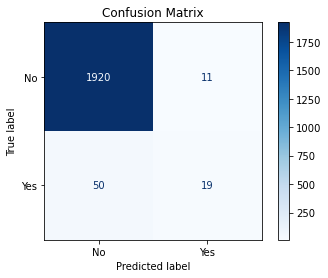

In [23]:
# Logistic Model
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train_scaled, y_train)
lr_pred = lr_model.predict(x_test_scaled)

lr_report = classification_report(y_test, lr_pred)
print(lr_report)

cm = confusion_matrix(y_test, lr_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1931
           1       0.33      0.59      0.42        69

    accuracy                           0.94      2000
   macro avg       0.66      0.78      0.70      2000
weighted avg       0.96      0.94      0.95      2000



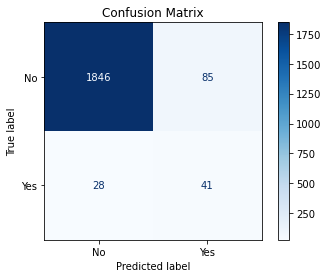

In [24]:
# Naive Bayes Model
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(x_train_scaled, y_train)
nb_pred = nb_model.predict(x_test_scaled)

nb_report = classification_report(y_test, nb_pred)
print(nb_report)

cm = confusion_matrix(y_test, nb_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1931
           1       0.34      0.36      0.35        69

    accuracy                           0.95      2000
   macro avg       0.66      0.67      0.66      2000
weighted avg       0.96      0.95      0.95      2000



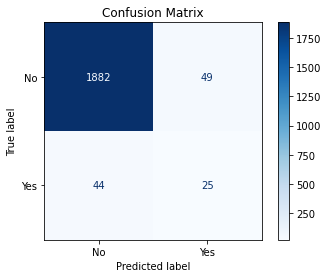

In [25]:
# K-NN Model
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train_scaled, y_train)
knn_pred = knn_model.predict(x_test_scaled)

knn_report = classification_report(y_test, knn_pred)
print(knn_report)

cm = confusion_matrix(y_test, knn_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

-----
 **PERFORMANCE OF DIFFERENT MODEL**
 
------

---- Logistic Regression ----:
- Accuracy: 97 (as expected to be high because of imbalanced dataset)
- For 'No' (majority class): precision = 0.99, recall = 0.96, f1-score = 0.97
- For 'Yes' (minority class): precision = 0.63, recall = 0.28, f1-score = 0.38
- From CM, TN = 1920, FP = 11, FN = 50, TP = 19

---- Naive Bayes Classifier ----:
- Accuracy: 94 (as expected to be high because of imbalanced dataset)
- For 'No' (majority class): precision = 0.99, recall = 0.96, f1-score = 0.97
- For 'Yes' (minority class): precision = 0.33, recall = 0.59, f1-score = 0.42
- From CM, TN = 1846, FP = 85, FN = 28, TP = 41

---- K-NN Classifier ----:
- Accuracy: 95 (as expected to be high because of imbalanced dataset)
- For 'No' (majority class): precision = 0.98, recall = 0.97, f1-score = 0.98
- For 'Yes' (minority class): precision = 0.34, recall = 0.36, f1-score = 0.35
- From CM, TN = 1882, FP = 49, FN = 44, TP = 25

----------------------------

-----
**SUMMARY OF THE RESULTANT MODELS**
 
------

- Standard Classifier models are designed in such a way to achieve overall accuracy score. So it can easily achieve it on a imbalanced dataset like `default.csv` we use as there are 96.6% of No. It can achieve an accuracy of 96.6% just by predicting 'No' for every input. So we check on how these models learn the minority class 'YES'.
- since logistic regression has high FN than TP meaning it showed its standard classifier behaviour of achieving high accuracy without learning minority class, its not a good one. It will answer as 'No' like we set it to 'No' by default.
- The Naive Bayes model had the highest number of True Positives (41). The reason for this is its less biased approach to classification.
- Naive Bayes uses probabilities. It calculates the probability of a data point belonging to a class based on its features, which makes it less sensitive to the overwhelming number of 'No' cases. It is more willing to say "Yes, this is a defaulter" even if it's slightly unsure. This is why it correctly identified more defaulters (TP=41) but also made more incorrect predictions (FP=85).
- knn performed better than logistic regression because feature scaling and handling outliers helped it perform better. 
- Without scaling, the income variable (which has a much larger range) would have unfairly dominated the distance calculations, essentially making the balance variable irrelevant. By bringing all features to a similar scale, KNN model's distance calculations became more accurate and meaningful, allowing it to correctly identify more of the default='Yes' cases.
***
- so either KNN or Naive Bayes should be a good one (Logistic regression cannot be considered since it didn't learnt about minority class). So we check other metrics of minority class:
    - Recall: The Naive Bayes model has a much higher recall (0.59), which means it correctly identified 59% of the actual defaulters. In contrast, the K-NN model only identified 36%. For a bank, a high recall is often more important than precision because it's better to flag a few extra clients for review (false positives) than to miss a client who will actually default (false negatives).
    - Precision: The K-NN model has a slightly higher precision (0.34), which means that of all the clients it flagged as potential defaulters, it was correct 34% of the time. The Naive Bayes model was correct 33% of the time. This is the trade-off; Naive Bayes is more willing to make mistakes to find more of the actual defaulters.
    - F1-Score: The F1-score is a weighted average of precision and recall. Naive Bayes has a significantly higher F1-score (0.42 vs. 0.35), which indicates it is the more balanced model overall for this specific task.
    
- To conclude, the **Naive Bayes Classifier** is the best-performing model for identifying potential defaulters.
